In [ ]:
#import libraries

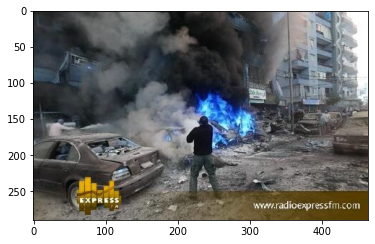

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:\\Users\\Acer\\images"

CATEGORIES = ["Radical", "Non-Radical"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

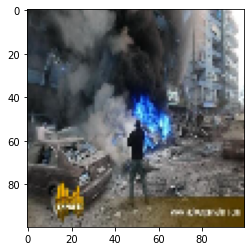

In [2]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [3]:
#loading dataset

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


100%|██████████| 449/449 [00:14<00:00, 31.77it/s]

1050


In [5]:
#pre-processing

In [6]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 33]
   [ 36]
   [ 39]
   ...
   [254]
   [255]
   [255]]

  [[ 34]
   [ 39]
   [ 44]
   ...
   [254]
   [255]
   [255]]

  [[ 38]
   [ 50]
   [ 50]
   ...
   [254]
   [255]
   [255]]

  ...

  [[ 94]
   [110]
   [110]
   ...
   [ 46]
   [ 46]
   [ 46]]

  [[109]
   [121]
   [115]
   ...
   [ 46]
   [ 46]
   [ 46]]

  [[114]
   [120]
   [110]
   ...
   [ 46]
   [ 46]
   [ 46]]]]


In [7]:
y=np.array(y) 

In [8]:
from sklearn.model_selection import train_test_split 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [9]:
#split for training and testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [11]:
print(y_train)
print(y_test)

[1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 1 

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [46]:
import seaborn as sns 
sns.set(font_scale=1.5)
import pandas as pd
import os 
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.models import Sequential

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.callbacks import LearningRateScheduler
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.interpolation import map_coordinates

In [47]:
datagen = ImageDataGenerator(
        rotation_range=10,  #This randomly rotates images
        zoom_range = 0.10,  #This randomly zooms images
        width_shift_range=0.1, #This randomly shifts images vertically
        height_shift_range=0.1 #This randomly shifts images horizontally 
        #preprocessing_function=lambda x: elastic_transform(x, alpha_range=[8,10], sigma=3) #Defined above
)

In [16]:
X_train = X_train/255.0
X_test=X_test/255.0
X_train

array([[[[0.24705882],
         [0.27843137],
         [0.25490196],
         ...,
         [0.38039216],
         [0.28235294],
         [0.28627451]],

        [[0.96078431],
         [0.98823529],
         [0.62352941],
         ...,
         [0.21960784],
         [0.94509804],
         [0.7372549 ]],

        [[0.50980392],
         [0.92941176],
         [0.8       ],
         ...,
         [0.89411765],
         [0.25490196],
         [0.64313725]],

        ...,

        [[0.74509804],
         [0.25098039],
         [0.26666667],
         ...,
         [0.2627451 ],
         [0.94509804],
         [0.97254902]],

        [[0.24705882],
         [0.76078431],
         [0.8       ],
         ...,
         [0.56862745],
         [0.03921569],
         [0.03529412]],

        [[0.97647059],
         [0.01960784],
         [0.76862745],
         ...,
         [0.02352941],
         [0.06666667],
         [0.01176471]]],


       [[[0.7254902 ],
         [0.76862745],
         [0.69

In [17]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
##perform augmentation

In [19]:
from tqdm import tqdm

In [20]:
final_train_data = []
final_target_train = []
for i in tqdm(range(X_train.shape[0])):
    final_train_data.append(X_train[i])
    final_train_data.append(rotate(X_train[i], angle=45, mode = 'wrap'))
    final_train_data.append(np.fliplr(X_train[i]))
    final_train_data.append(np.flipud(X_train[i]))
    final_train_data.append(random_noise(X_train[i],var=0.2**2))
    for j in range(5):
        final_target_train.append(y_train[i])

100%|██████████| 840/840 [00:01<00:00, 611.35it/s]


In [41]:
final_test_data = []
final_target_test = []
for i in tqdm(range(X_test.shape[0])):
    final_test_data.append(X_test[i])
    final_test_data.append(rotate(X_test[i], angle=45, mode = 'wrap'))
    final_test_data.append(np.fliplr(X_test[i]))
    final_test_data.append(np.flipud(X_test[i]))
    final_test_data.append(random_noise(X_test[i],var=0.2**2))
    for j in range(5):
        final_target_test.append(y_test[i])

100%|██████████| 210/210 [00:00<00:00, 271.70it/s]


In [21]:
print(len(final_target_train), len(final_train_data))
X_train = np.array(final_train_data)
y_train = np.array(final_target_train)

4200 4200


In [42]:
print(len(final_target_test), len(final_test_data))
X_test = np.array(final_test_data)
y_test = np.array(final_target_test)

1050 1050


In [47]:

from matplotlib import pyplot
from os import makedirs
 
# fit model on dataset
def fit_model(X_train,y_trainy):
    model = Sequential()
    
    model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=64, epochs=10)

    return model

# create directory for models
makedirs('modelss')
# fit and save models
n_members = 3
for i in range(1,n_members):
	# fit model
	model = fit_model(X_train, y_train)
	# save model
	filename = 'modelss/model_' + str(i + 1) + '.h5'
	model.save(filename)
	print('>Saved %s' % filename)

Epoch 1/10
66/66 [==============================] - 413s 6s/step - loss: 0.6937 - accuracy: 0.6279
Epoch 2/10
66/66 [==============================] - 404s 6s/step - loss: 0.5402 - accuracy: 0.7290
Epoch 3/10
66/66 [==============================] - 412s 6s/step - loss: 0.4670 - accuracy: 0.7767
Epoch 4/10
66/66 [==============================] - 294s 4s/step - loss: 0.4258 - accuracy: 0.7990
Epoch 5/10
66/66 [==============================] - 280s 4s/step - loss: 0.3956 - accuracy: 0.8200
Epoch 6/10
66/66 [==============================] - 298s 5s/step - loss: 0.3251 - accuracy: 0.8579
Epoch 7/10
66/66 [==============================] - 410s 6s/step - loss: 0.2831 - accuracy: 0.8764
Epoch 8/10
66/66 [==============================] - 410s 6s/step - loss: 0.2395 - accuracy: 0.8998
Epoch 9/10
66/66 [==============================] - 425s 6s/step - loss: 0.1939 - accuracy: 0.9243
Epoch 10/10
66/66 [==============================] - 423s 6s/step - loss: 0.1571 - accuracy: 0.9400
>Saved mo

In [43]:
n_members = 3
members = load_all_models(n_members)
print('Loaded %d models' % len(members))
for model in members:
	_, acc = model.evaluate(X_test, y_test)
	print('Model Accuracy: %.3f' % acc)

>loaded modelss/model_1.h5
>loaded modelss/model_2.h5
>loaded modelss/model_3.h5
Loaded 3 models
33/33 [==============================] - 33s 983ms/step - loss: 1.0589 - accuracy: 0.7905
Model Accuracy: 0.790
33/33 [==============================] - 33s 981ms/step - loss: 0.7436 - accuracy: 0.7876
Model Accuracy: 0.788
33/33 [==============================] - 33s 983ms/step - loss: 0.7977 - accuracy: 0.8057
Model Accuracy: 0.806


In [48]:
trainX, testX = X_train, X_test
trainy, testy = y_train, y_test
print(trainy.shape, testy.shape)

(4200,) (1050,)


In [49]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model
from keras.models import load_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
from numpy import argmax

In [53]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from numpy import dstack
 
# load models from file
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'modelss/model_' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models
 
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX
 
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LogisticRegression()
	model.fit(stackedX, inputy)
	return model
 
# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat
 
# generate 2d classification dataset
#X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)

# load all models
n_members = 3
members = load_all_models(n_members)
print('Loaded %d modelss' % len(members))
# evaluate standalone models on test dataset
for model in members:
	#testy_enc = to_categorical(testy)
	_, acc = model.evaluate(testX, testy, verbose=0)
	print('Model Accuracy: %.3f' % acc)
# fit stacked model using the ensemble
model = fit_stacked_model(members, testX, testy)
# evaluate model on test set
yhat = stacked_prediction(members, model, testX)
acc = accuracy_score(testy, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

>loaded modelss/model_1.h5
>loaded modelss/model_2.h5
>loaded modelss/model_3.h5
Loaded 3 modelss
Model Accuracy: 0.790
Model Accuracy: 0.788
Model Accuracy: 0.806
Stacked Test Accuracy: 0.818
